last.fm

Application name	musicteam2
API key	8c9607ac02769e9fa8b0dfcdf74a6993
Shared secret	581f02183b1a294aa717517708ce9d56
Registered to	noeliareina


API ROOT

The API root URL is located at http://ws.audioscrobbler.com/2.0/

In [ ]:
#pip install spotipy

In [43]:
import requests # Traemos la librería para usarla.

# Hacemos la petición a un API de ejemplo.
response = requests.get('https://api.spotify.com/v1/albums/%7Bid%7D') # Esta dirección es el famoso "endpoint".

# Mostramos la respuesta que nos devuelve el API.
print(response.json())

{'error': {'status': 401, 'message': 'No token provided'}}


In [42]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# Coloca tus credenciales aquí
CLIENT_ID = '13122d95aee54d2e828fdbc53ab27756'
CLIENT_SECRET = '628a3ebb227a4a46a8cdc6cc44327ee6'
# Autenticación
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

1. FASE 1: EXTRACCION DE DATOS
Extracción de datos desde API de Spotify
- Obtener info sobre canciones, álbumes, géneros y artistas (las claves del dict)
Endpoint ejemplo: https://api.spotify.com/id/albums/{id}
Debemos proporcionar detalles de: nombre, año de lanzamiento y artistas involucrados.

#tareas
A. Extraer canciones y albumes lanzados entre 2000 a 2024 (2025)
B. Elegir un rango de 5 años para extraer datos. Ej: 2000 a 2005
C. Seleccionar 4 géneros musicales para desarrollo proyecto
D. Extraer: Artista, género musical, tipo (canción o álbum), nombre, año de nacimiento, ID # idioma inglés?


playlists = sp.user_playlists('spotify')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

In [25]:
type(sp)

spotipy.client.Spotify

In [45]:
sp.search(q = "genre:pop year:2000", limit=10, offset=0, type='track,album', market="ES")

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=10&query=genre%3Apop%20year%3A2000&type=track&market=ES',
  'limit': 10,
  'next': 'https://api.spotify.com/v1/search?offset=10&limit=10&query=genre%3Apop%20year%3A2000&type=track&market=ES',
  'offset': 0,
  'previous': None,
  'total': 100,
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'},
       'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU',
       'id': '4gzpq5DPGxSnKTe4SA8HAU',
       'name': 'Coldplay',
       'type': 'artist',
       'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6ZG5lRT77aJ3btmArcykra'},
     'href': 'https://api.spotify.com/v1/albums/6ZG5lRT77aJ3btmArcykra',
     'id': '6ZG5lRT77aJ3btmArcykra',
     'images': [{'height': 640,
       'width': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b2739

In [46]:
datos_2000 = sp.search(q = "genre:pop year:2000", limit=10, offset=0, type='track,album', market="ES")

In [47]:
datos_2000.keys()

dict_keys(['tracks', 'albums'])

In [48]:
datos_2000['tracks'].keys()

dict_keys(['href', 'limit', 'next', 'offset', 'previous', 'total', 'items'])

In [49]:
datos_2000['tracks']['items'][0]['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'},
 'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU',
 'id': '4gzpq5DPGxSnKTe4SA8HAU',
 'name': 'Coldplay',
 'type': 'artist',
 'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}

In [50]:
datos_2000['tracks']['items'][0]['artists'][0]['name']

'Coldplay'

In [76]:
for track, artists in datos_2000.items(): # COMO USAR ESTO
    print(f"El artista {artists} de la canción {track}")

El artista {'href': 'https://api.spotify.com/v1/search?offset=0&limit=10&query=genre%3Apop%20year%3A2000&type=track&market=ES', 'limit': 10, 'next': 'https://api.spotify.com/v1/search?offset=10&limit=10&query=genre%3Apop%20year%3A2000&type=track&market=ES', 'offset': 0, 'previous': None, 'total': 100, 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'}, 'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU', 'id': '4gzpq5DPGxSnKTe4SA8HAU', 'name': 'Coldplay', 'type': 'artist', 'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/6ZG5lRT77aJ3btmArcykra'}, 'href': 'https://api.spotify.com/v1/albums/6ZG5lRT77aJ3btmArcykra', 'id': '6ZG5lRT77aJ3btmArcykra', 'images': [{'height': 640, 'width': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2739164bafe9aaa168d93f4816a'}, {'height': 300, 'width': 300, 'url': 'https://i.scdn.co/ima

In [61]:
datos_2000['albums']

{'href': 'https://api.spotify.com/v1/search?offset=0&limit=10&query=genre%3Apop%20year%3A2000&type=album&market=ES',
 'limit': 10,
 'next': None,
 'offset': 0,
 'previous': None,
 'total': 0,
 'items': []}

In [63]:
#  Función para obtener las canciones populares
#Usando el endpoint de búsqueda de Spotify, se puede filtrar por año. La función buscará los Top 5 tracks en cada lustro.
def obtener_top_tracks_por_lustro(inicio, fin, limite=10):
    query = f"year:{inicio}-{fin}"
    resultados = sp.search(q=query, type='track', limit=limite)
    tracks = []

    for item in datos_2000['tracks']['items']:
        track = {
            'nombre': item['name'],
            'artista': item['artists'][0]['name'],
            'popularidad': item['popularity'],
            'url': item['external_urls']['spotify']
        }
        tracks.append(track)

    return tracks


¿Qué hace esta función?
La función se llama obtener_top_tracks_por_lustro() y su objetivo es:

Buscar las canciones más populares en un rango de años (un lustro).
Obtener el Top 5 de esas canciones.
Guardar la información relevante de cada canción (nombre, artista, popularidad y URL de Spotify).
Define una función llamada obtener_top_tracks_por_lustro.
Recibe tres parámetros:
inicio: Año inicial del rango (ej. 2000).
fin: Año final del rango (ej. 2005).
limite: Número de canciones que queremos obtener (por defecto 5).
Crea una consulta (query) para buscar canciones dentro del rango de años especificado.
Usa f-strings para construir el texto dinámicamente.
Si inicio es 2000 y fin es 2005, la consulta sería: "year:2000-2005".
Utiliza el método search() de la API de Spotify para buscar canciones.
q=query: La consulta con el rango de años.
type='track': Especifica que buscamos canciones.
limit=limite: Limita el número de resultados al valor de limite (por defecto 5).
La variable resultados almacena la respuesta de la API.
Crea una lista vacía llamada tracks para guardar la información de las canciones.
Recorre todos los resultados obtenidos en la búsqueda.
La respuesta de la API es un diccionario que contiene una lista de canciones en resultados['tracks']['items'].
Crea un diccionario track para almacenar información relevante de cada canción:
'nombre': Nombre de la canción.
'artista': Nombre del primer artista listado.
'popularidad': Puntaje de popularidad (0 a 100) dado por Spotify.
'url': Enlace a la canción en Spotify.


In [64]:
lustros = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2025)]
datos_popularidad = {}

for inicio, fin in lustros:
    print(f"Obteniendo datos de {inicio} a {fin}...")
    datos_popularidad[f"{inicio}-{fin}"] = obtener_top_tracks_por_lustro(inicio, fin)

# Imprimir resultados
for periodo, tracks in datos_popularidad.items():
    print(f"\nTop 10 de {periodo}:")
    for idx, track in enumerate(tracks, 1):
        print(f"{idx}. {track['nombre']} - {track['artista']} (Popularidad: {track['popularidad']})")


Obteniendo datos de 2000 a 2004...
Obteniendo datos de 2005 a 2009...
Obteniendo datos de 2010 a 2014...
Obteniendo datos de 2015 a 2019...
Obteniendo datos de 2020 a 2025...

Top 10 de 2000-2004:
1. Yellow - Coldplay (Popularidad: 86)
2. La Playa - La Oreja de Van Gogh (Popularidad: 70)
3. Cómo hablar - Amaral (Popularidad: 55)
4. Cuídate - La Oreja de Van Gogh (Popularidad: 64)
5. Oops!...I Did It Again - Britney Spears (Popularidad: 77)
6. Bye Bye Bye - From Deadpool and Wolverine Soundtrack - *NSYNC (Popularidad: 79)
7. El cielo no entiende - OBK (Popularidad: 49)
8. By Your Side - Sade (Popularidad: 68)
9. Pop - La Oreja de Van Gogh (Popularidad: 53)
10. Trouble - Coldplay (Popularidad: 70)

Top 10 de 2005-2009:
1. Yellow - Coldplay (Popularidad: 86)
2. La Playa - La Oreja de Van Gogh (Popularidad: 70)
3. Cómo hablar - Amaral (Popularidad: 55)
4. Cuídate - La Oreja de Van Gogh (Popularidad: 64)
5. Oops!...I Did It Again - Britney Spears (Popularidad: 77)
6. Bye Bye Bye - From Dead

In [55]:
paises_mediterraneos = {
    "ES": "España", "FR": "Francia", "MC": "Mónaco", "IT": "Italia", 
    "SI": "Eslovenia", "HR": "Croacia", "BA": "Bosnia y Herzegovina", 
    "ME": "Montenegro", "AL": "Albania", "GR": "Grecia", 
    "MT": "Malta", "CY": "Chipre"
}

paises_este_europa = {
    "BY": "Bielorrusia", "BG": "Bulgaria", "CZ": "Chequia", 
    "SK": "Eslovaquia", "HU": "Hungría", "MD": "Moldavia", 
    "PL": "Polonia", "RO": "Rumanía", "UA": "Ucrania"
}

paises_norte_europa = {
    "DK": "Dinamarca", "EE": "Estonia", "FI": "Finlandia", 
    "IS": "Islandia", "IE": "Irlanda", "LT": "Lituania", 
    "LV": "Letonia", "NO": "Noruega", "SE": "Suecia", "GB": "Reino Unido"
}

paises_europa_central = {
    "AT": "Austria", "DE": "Alemania", "CH": "Suiza", 
    "LI": "Liechtenstein", "BE": "Bélgica", 
    "LU": "Luxemburgo", "NL": "Países Bajos"
}


Función para obtener tracks por país
Ajustamos la función para que use el parámetro market para obtener datos por país:

In [56]:
def obtener_top_tracks_por_pais_y_lustro(inicio, fin, pais, limite=5):
    query = f"year:{inicio}-{fin}"
    resultados = sp.search(q=query, type='track', limit=limite, market=pais)
    tracks = []

    for item in resultados['tracks']['items']:
        track = {
            'id': item['id'],
            'nombre': item['name'],
            'artista': item['artists'][0]['name'],
            'popularidad': item['popularity'],
            'url': item['external_urls']['spotify']
        }
        tracks.append(track)

    return tracks


Función para obtener características de audio
Igual que antes, para complementar el análisis con métricas de audio:

In [57]:
def obtener_audio_features(ids):
    features = sp.audio_features(ids)
    return features


Flujo para obtener datos por regiones
Recorreremos cada región y país, almacenando los resultados:

In [58]:
scope = "user-read-private user-read-email"


In [59]:
regiones = {
    "Mediterraneos": paises_mediterraneos,
    "Este_Europa": paises_este_europa,
    "Norte_Europa": paises_norte_europa,
    "Europa_Central": paises_europa_central
}

lustros = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2025)]
datos_por_region = {}

for nombre_region, paises in regiones.items():
    datos_por_region[nombre_region] = {}

    for codigo_pais, nombre_pais in paises.items():
        print(f"\nAnalizando {nombre_pais} ({codigo_pais}) en {nombre_region}...")

        for inicio, fin in lustros:
            print(f"  Lustro {inicio}-{fin}...")
            tracks = obtener_top_tracks_por_pais_y_lustro(inicio, fin, codigo_pais)

            # Obtener IDs de las canciones para características de audio
            ids = [track['id'] for track in tracks]
            if ids:
                audio_features = obtener_audio_features(ids)

                for i, feature in enumerate(audio_features):
                    if feature:
                        tracks[i]['danceability'] = feature['danceability']
                        tracks[i]['energy'] = feature['energy']
                        tracks[i]['valence'] = feature['valence']
                        tracks[i]['tempo'] = feature['tempo']

            datos_por_region[nombre_region].setdefault(codigo_pais, {})[f"{inicio}-{fin}"] = tracks


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4waqcUQWdj0yH26STWl2Rq,0eVborSuxUeSg0meWYd9dZ,4kJP8Z888wREJ8bRMWNMuk,428cFrawSqeLoyooQjAW9d,3AJwUDP919kvQ9QcozQPxg with Params: {} returned 403 due to None



Analizando España (ES) en Mediterraneos...
  Lustro 2000-2004...


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4waqcUQWdj0yH26STWl2Rq,0eVborSuxUeSg0meWYd9dZ,4kJP8Z888wREJ8bRMWNMuk,428cFrawSqeLoyooQjAW9d,3AJwUDP919kvQ9QcozQPxg:
 None, reason: None

Visualización y análisis de resultados
Podemos visualizar datos agrupados por región:

Posibles análisis y extensiones
Comparativa entre regiones: ¿Qué región tiene la música más alegre (valence) o bailable (danceability)?
Tendencias temporales: ¿Cómo ha cambiado el tempo o la energía a lo largo de los lustros en cada región?
Análisis de popularidad: ¿Qué canciones se mantuvieron populares en múltiples países o regiones?


Consideraciones adicionales
Limites de API: La API de Spotify tiene límites de tasa, maneja los errores usando try-except y espera si es necesario.
Disponibilidad de datos: Algunas canciones pueden no estar disponibles en ciertos países.
Optimización: Para un análisis más rápido, podrías limitar la cantidad de canciones (limite) o países analizados.

 1. Redefiniendo el objetivo: Keep it Simple
En lugar de abarcar tantas regiones y lustros, podrías empezar con algo más manejable como:

Análisis de popularidad en un solo país (por ejemplo, España) para todos los lustros.
Comparación de dos países de una misma región (ej. España e Italia).
Tendencias de popularidad de un solo género (ej. Pop o Rock) en un solo país.
Esto reducirá la complejidad y el volumen de datos, facilitando el análisis y la visualización.

2. Simplificando el enfoque: Pasos básicos
Aquí va una versión más sencilla del flujo de trabajo:

Obtener el Top 5 de canciones en un solo país.
Filtrar por año (por ejemplo, solo para 2020-2025).
Obtener popularidad y características básicas (danceability, energy, etc.).
Visualizar los datos en gráficos simples.

3. CÓDIGO SIMPLIFICADO

4. ¿Qué hace este código?
Obtiene el Top 5 de canciones en España para el lustro 2020-2025.
Muestra nombre, artista y popularidad de las canciones.
Visualiza un gráfico de barras de la popularidad.

5. Siguientes pasos
Si este código funciona bien, podrías:
Agregar otro país para comparar (ej. Italia).
Probar con otro lustro (ej. 2015-2019).
Añadir características de audio como danceability o energy (cuando te sientas más cómodo).


## Código simplificado
Aquí tienes un código mucho más sencillo que te ayudará a obtener el Top 5 de canciones en España para el lustro 2020-2025, y visualizar la popularidad:

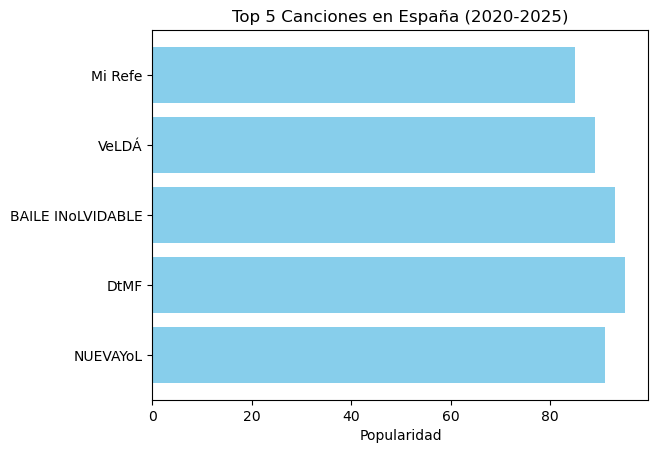

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# Configuración de autenticación
client_id = '13122d95aee54d2e828fdbc53ab27756'
client_secret = '628a3ebb227a4a46a8cdc6cc44327ee6'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
))

# Función para obtener Top 5 canciones en España (2020-2025)
def obtener_top_tracks_espana():
    query = "year:2020-2025"
    resultados = sp.search(q=query, type='track', limit=5, market='ES')
    tracks = []

    for item in resultados['tracks']['items']:
        track = {
            'nombre': item['name'],
            'artista': item['artists'][0]['name'],
            'popularidad': item['popularity']
        }
        tracks.append(track)

    return tracks

# Obtener datos y visualizar
top_tracks = obtener_top_tracks_espana()

# Visualizar popularidad
nombres = [track['nombre'] for track in top_tracks]
popularidad = [track['popularidad'] for track in top_tracks]

plt.barh(nombres, popularidad, color='skyblue')
plt.xlabel('Popularidad')
plt.title('Top 5 Canciones en España (2020-2025)')
plt.show()


¿Qué hará este código?
Buscará el Top 20 de canciones en varios países.
Lo hará por lustros (2000-2005, 2006-2010, etc.).
Obtendrá la popularidad de las canciones.
Visualizará los resultados en un gráfico de barras.

In [ ]:
paises_mediterraneos = {
    "ES": "España",
    "FR": "Francia",
    "IT": "Italia",
    "GR": "Grecia"
}


In [ ]:

# Países a analizar
paises_mediterraneos = {
    "ES": "España",
    "FR": "Francia",
    "IT": "Italia",
    "GR": "Grecia"
}

# Lustros a analizar
lustros = [
    (2000, 2005),
    (2006, 2010),
    (2011, 2015),
    (2016, 2020),
    (2021, 2025)
]

# Función para obtener el Top 20 de canciones por país y lustro
def obtener_top_tracks_por_lustro_y_pais(inicio, fin, pais, limite=20):
    query = f"year:{inicio}-{fin}"
    resultados = sp.search(q=query, type='track', limit=limite, market=pais)
    popularidades = []

    for item in resultados['tracks']['items']:
        popularidades.append(item['popularity'])

    return popularidades

# Almacena los datos para graficar
datos_popularidad = {pais: [] for pais in paises_mediterraneos.keys()}

# Obtener popularidad por país y lustro
for codigo_pais, nombre_pais in paises_mediterraneos.items():
    print(f"Obteniendo datos para {nombre_pais}...")
    for inicio, fin in lustros:
        popularidades = obtener_top_tracks_por_lustro_y_pais(inicio, fin, codigo_pais)
        #promedio_popularidad = np.mean(popularidades) if popularidades else 0
        #datos_popularidad[codigo_pais].append(promedio_popularidad)






Obteniendo datos para España...
Obteniendo datos para Francia...
Obteniendo datos para Italia...
Obteniendo datos para Grecia...


TypeError: list indices must be integers or slices, not str

GET ARTIST
https://api.spotify.com/v1/artists/{id}

In [ ]:
import requests
import time

# 🔑 Credenciales de Spotify (reemplázalas con las tuyas)
client_id = 'TU_CLIENT_ID'
client_secret = 'TU_CLIENT_SECRET'

# 🎯 Parámetros de búsqueda
pais = "ES"  # Ejemplo: España
genero = "pop"  # Género musical
limite_artistas = 5

# 📌 URL para obtener el Access Token
url_auth = "https://accounts.spotify.com/api/token"
headers_auth = {
    "Content-Type": "application/x-www-form-urlencoded"
}
data_auth = {
    "grant_type": "client_credentials",
    "client_id": client_id,
    "client_secret": client_secret
}

# 🔒 Obtener Token de Acceso
response_auth = requests.post(url_auth, headers=headers_auth, data=data_auth)
if response_auth.status_code == 200:
    access_token = response_auth.json()['access_token']
else:
    print("Error de autenticación:", response_auth.json())
    exit()

# 🎟️ Configuración del header con el Token de Acceso
headers = {
    "Authorization": f"Bearer {access_token}"
}

# 🚀 Bucle while para obtener los 5 artistas más populares
artistas_encontrados = []
offset = 0
while len(artistas_encontrados) < limite_artistas:
    # Endpoint de búsqueda de Spotify
    url_search = "https://api.spotify.com/v1/search"
    params = {
        "q": f"genre:{genero}",
        "type": "artist",
        "market": pais,
        "limit": 50,
        "offset": offset
    }
    
    # 🟢 Hacer la solicitud GET
    response = requests.get(url_search, headers=headers, params=params)
    if response.status_code == 200:
        resultados = response.json()
        
        for item in resultados['artists']['items']:
            if pais in item['available_markets']:
                artista = {
                    'nombre': item['name'],
                    'popularidad': item['popularity'],
                    'url': item['external_urls']['spotify']
                }
                artistas_encontrados.append(artista)
            
            # Rompe el bucle si ya se obtuvieron los 5 artistas
            if len(artistas_encontrados) >= limite_artistas:
                break
                
        # Si no hay más resultados, rompe el bucle
        if len(resultados['artists']['items']) == 0:
            break
        
        # Incrementa el offset para buscar en la siguiente "página" de resultados
        offset += 50
        time.sleep(0.5)  # Pausa para evitar el límite de solicitudes
        
    else:
        print("Error en la solicitud:", response.json())
        break

# 📊 Imprimir resultados de los 5 artistas más populares
print("\n=== Top 5 Artistas Más Populares ===")
for idx, artista in enumerate(artistas_encontrados, start=1):
    print(f"{idx}. {artista['nombre']} (Popularidad: {artista['popularidad']}) - {artista['url']}")
